In [4]:
!pip install pandas


In [6]:
# Gantilah 'nama_file.csv' dengan nama file CSV Anda
data = pd.read_csv('emnist-bymerge-test.csv')

# Menampilkan data untuk memverifikasi bahwa CSV telah berhasil dibaca
print(data)

        24  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.457  0.458  \
0       22  0    0    0    0    0    0    0    0    0  ...      0      0   
1       28  0    0    0    0    0    0    0    0    0  ...      0      0   
2        0  0    0    0    0    0    0    0    0    0  ...      0      0   
3        5  0    0    0    0    0    0    0    0    0  ...      0      0   
4        8  0    0    0    0    0    0    0    0    0  ...      0      0   
...     .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
116317   9  0    0    0    0    0    0    0    0    0  ...      0      0   
116318   7  0    0    0    0    0    0    0    0    0  ...      0      0   
116319   3  0    0    0    0    0    0    0    0    0  ...      0      0   
116320   3  0    0    0    0    0    0    0    0    0  ...      0      0   
116321   7  0    0    0    0    0    0    0    0    0  ...      0      0   

        0.459  0.460  0.461  0.462  0.463  0.464  0.465  0.466  
0           0      0  

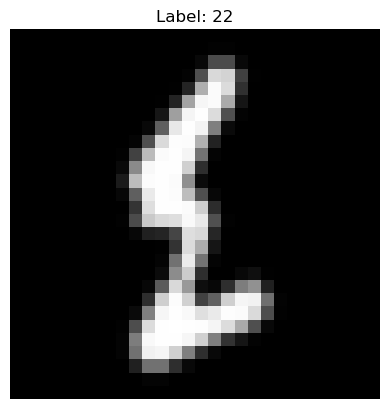

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Baca file CSV
data = pd.read_csv('emnist-bymerge-test.csv')

# Pilih gambar pertama untuk ditampilkan (misalnya baris pertama)
# Asumsi: Kolom pertama adalah label dan sisanya adalah piksel
label = data.iloc[0, 0]            # Label untuk gambar
pixels = data.iloc[0, 1:].values    # Data piksel

# Ubah data piksel menjadi matriks 2D (28x28)
image = pixels.reshape(28, 28)

# Tampilkan gambar
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')  # Hilangkan sumbu
plt.show()


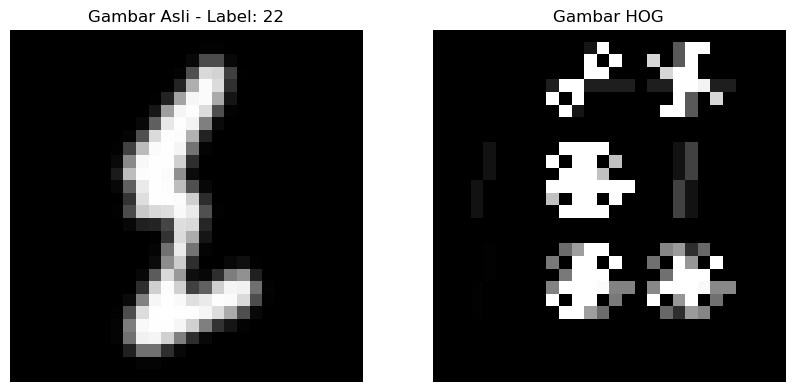

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Membaca file CSV
image_data = pd.read_csv('emnist-bymerge-test.csv')

# Misalkan kolom pertama adalah label dan kolom sisanya adalah piksel
# Misalkan setiap gambar adalah 28x28 (misalnya, jika dataset EMNIST)
images = image_data.iloc[:, 1:].values.reshape(-1, 28, 28)  # Mengubah ke format (n, 28, 28)
labels = image_data.iloc[:, 0].values  # Kolom pertama sebagai label

# Ambil satu gambar untuk contoh
sample_image = images[0]  # Ambil gambar pertama
sample_label = labels[0]   # Ambil label untuk gambar pertama

# Ekstraksi fitur HOG
hog_features, hog_image = hog(sample_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Meningkatkan kontras dari gambar HOG
hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Menampilkan gambar asli dan gambar HOG
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap='gray')
plt.title(f'Gambar Asli - Label: {sample_label}')
plt.axis('off')

# Gambar HOG
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('Gambar HOG')
plt.axis('off')

plt.show()


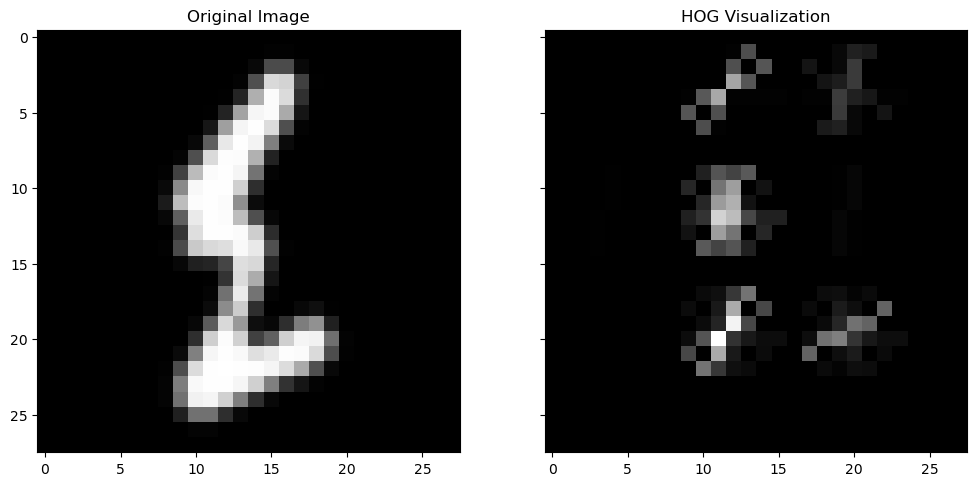

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load dataset dari CSV (misalnya: 'emnist-bymerge-test.csv')
data = pd.read_csv('emnist-bymerge-test.csv')

# Data EMNIST terdiri dari label di kolom pertama dan piksel di kolom berikutnya
y = data.iloc[:, 0].values           # Label
X = data.iloc[:, 1:].values           # Gambar dalam bentuk 28x28 piksel yang diratakan

# Memilih salah satu gambar untuk ditampilkan dan melakukan ekstraksi HOG
sample_image = X[0].reshape(28, 28)   # Ambil gambar pertama dan ubah menjadi bentuk 28x28

# Ekstraksi fitur HOG dan visualisasi
fd, hog_image = hog(sample_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Menampilkan gambar asli dan HOG-nya
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax1.imshow(sample_image, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('HOG Visualization')
plt.show()

# Ekstraksi Fitur HOG untuk semua gambar
def extract_hog_features(images):
    hog_features = []
    for image in images:
        image = image.reshape(28, 28)  # Pastikan setiap gambar berbentuk 28x28
        feature = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
        hog_features.append(feature)
    return np.array(hog_features)

# Ekstraksi fitur HOG untuk data latih
X_hog = extract_hog_features(X)

# Membuat model SVM dengan pipeline (normalisasi + SVM)
model = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Membagi data latih dan data uji (misalnya: 80% data latih, 20% data uji)
split_index = int(0.8 * len(X_hog))
X_train, X_test = X_hog[:split_index], X_hog[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Melatih model
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Menampilkan laporan hasil klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


In [7]:
# Gantilah 'nama_file.csv' dengan nama file CSV Anda
data = pd.read_csv('emnist-bymerge-train.csv')

# Menampilkan data untuk memverifikasi bahwa CSV telah berhasil dibaca
print(data)

        24  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.431  0.432  \
0       36  0    0    0    0    0    0    0    0    0  ...      0      0   
1        5  0    0    0    0    0    0    0    0    0  ...      0      0   
2        6  0    0    0    0    0    0    0    0    0  ...      0      0   
3       35  0    0    0    0    0    0    0    0    0  ...      0      0   
4        6  0    0    0    0    0    0    0    0    0  ...      0      0   
...     .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
697926  45  0    0    0    0    0    0    0    0    0  ...      0      0   
697927  25  0    0    0    0    0    0    0    0    0  ...      0      0   
697928   9  0    0    0    0    0    0    0    0    0  ...      0      0   
697929  36  0    0    0    0    0    0    0    0    0  ...      0      0   
697930   1  0    0    0    0    0    0    0    0    0  ...      0      0   

        0.433  0.434  0.435  0.436  0.437  0.438  0.439  0.440  
0           0      0  

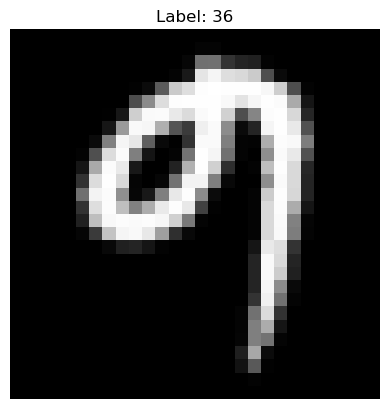

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Baca file CSV
data = pd.read_csv('emnist-bymerge-train.csv')

# Pilih gambar pertama untuk ditampilkan (misalnya baris pertama)
# Asumsi: Kolom pertama adalah label dan sisanya adalah piksel
label = data.iloc[0, 0]            # Label untuk gambar
pixels = data.iloc[0, 1:].values    # Data piksel

# Ubah data piksel menjadi matriks 2D (28x28)
image = pixels.reshape(28, 28)

# Tampilkan gambar
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')  # Hilangkan sumbu
plt.show()


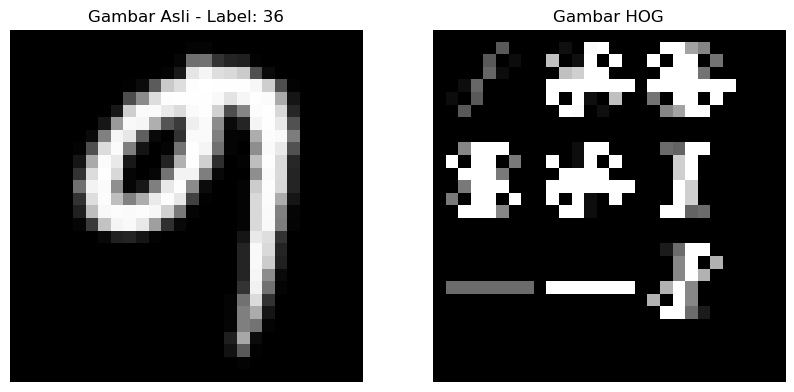

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Membaca file CSV
image_data = pd.read_csv('emnist-bymerge-train.csv')

# Misalkan kolom pertama adalah label dan kolom sisanya adalah piksel
# Misalkan setiap gambar adalah 28x28 (misalnya, jika dataset EMNIST)
images = image_data.iloc[:, 1:].values.reshape(-1, 28, 28)  # Mengubah ke format (n, 28, 28)
labels = image_data.iloc[:, 0].values  # Kolom pertama sebagai label

# Ambil satu gambar untuk contoh
sample_image = images[0]  # Ambil gambar pertama
sample_label = labels[0]   # Ambil label untuk gambar pertama

# Ekstraksi fitur HOG
hog_features, hog_image = hog(sample_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Meningkatkan kontras dari gambar HOG
hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Menampilkan gambar asli dan gambar HOG
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap='gray')
plt.title(f'Gambar Asli - Label: {sample_label}')
plt.axis('off')

# Gambar HOG
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('Gambar HOG')
plt.axis('off')

plt.show()


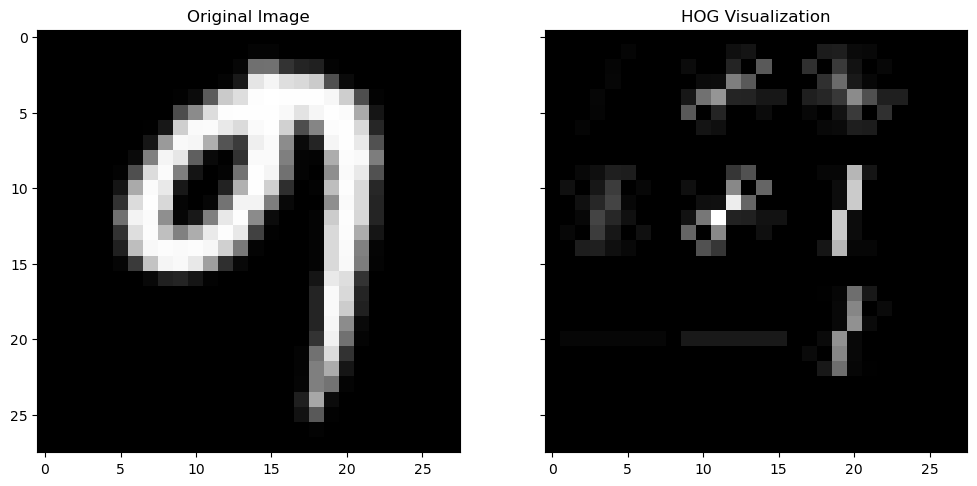

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load dataset dari CSV (misalnya: 'emnist-bymerge-test.csv')
data = pd.read_csv('emnist-bymerge-train.csv')

# Data EMNIST terdiri dari label di kolom pertama dan piksel di kolom berikutnya
y = data.iloc[:, 0].values           # Label
X = data.iloc[:, 1:].values           # Gambar dalam bentuk 28x28 piksel yang diratakan

# Memilih salah satu gambar untuk ditampilkan dan melakukan ekstraksi HOG
sample_image = X[0].reshape(28, 28)   # Ambil gambar pertama dan ubah menjadi bentuk 28x28

# Ekstraksi fitur HOG dan visualisasi
fd, hog_image = hog(sample_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Menampilkan gambar asli dan HOG-nya
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax1.imshow(sample_image, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('HOG Visualization')
plt.show()

# Ekstraksi Fitur HOG untuk semua gambar
def extract_hog_features(images):
    hog_features = []
    for image in images:
        image = image.reshape(28, 28)  # Pastikan setiap gambar berbentuk 28x28
        feature = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)
        hog_features.append(feature)
    return np.array(hog_features)

# Ekstraksi fitur HOG untuk data latih
X_hog = extract_hog_features(X)

# Membuat model SVM dengan pipeline (normalisasi + SVM)
model = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Membagi data latih dan data uji (misalnya: 80% data latih, 20% data uji)
split_index = int(0.8 * len(X_hog))
X_train, X_test = X_hog[:split_index], X_hog[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Melatih model
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Menampilkan laporan hasil klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


In [2]:
!pip install pandas

In [5]:
!pip install scikit image scikit learn

ERROR: Could not find a version that satisfies the requirement scikit (from versions: none)
ERROR: No matching distribution found for scikit


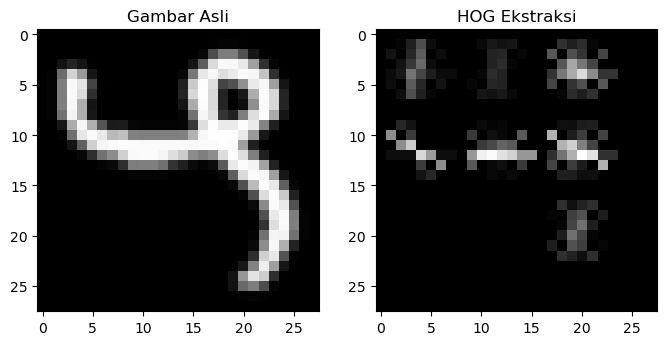

ValueError: Found input variables with inconsistent numbers of samples: [1, 93057]

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Gantilah 'emnist-bymerge-test.csv' dengan nama file CSV Anda
data = pd.read_csv('emnist-bymerge-test.csv')

# Pisahkan fitur (gambar) dan label
X = data.iloc[:, 1:].values  # Asumsikan kolom pertama adalah label
y = data.iloc[:, 0].values   # Asumsikan kolom pertama adalah label

# Bagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from skimage import exposure

def extract_hog_features(images, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    hog_features = []
    hog_images = []
    for image in images:
        # Reshape image to 28x28 (atau ukuran gambar asli)
        image = image.reshape((28, 28))
        
        # Ekstraksi fitur HOG dengan visualisasi
        feature, hog_image = hog(
            image, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, 
            visualize=True, block_norm='L2-Hys'
        )
        
        hog_features.append(feature)
        hog_images.append(hog_image)
        
    return np.array(hog_features), hog_images

# Ekstraksi fitur HOG dan simpan visualisasi untuk sampel pertama
X_train_hog, hog_images = extract_hog_features(X_train[:1])

# Tampilkan gambar asli dan HOG-nya
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title("Gambar Asli")

plt.subplot(1, 2, 2)
plt.imshow(hog_images[0], cmap='gray')
plt.title("HOG Ekstraksi")
plt.show()

# Membuat pipeline dengan HOG extraction, normalisasi, dan SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling untuk mengoptimalkan SVM
    ('svm', SVC())
])

# Definisikan parameter grid untuk tuning
param_grid = {
    'svm__C': [0.1, 1, 10],            # Parameter regulasi untuk SVM
}

# Mencari parameter terbaik dengan GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(X_train_hog, y_train)

# Hasil grid search
print("Best parameters:", grid.best_params_)

# Evaluasi model dengan data uji
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))


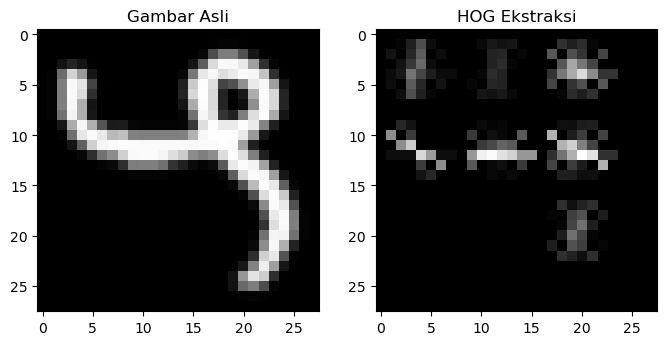

NameError: name 'X_test_hog' is not defined

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Gantilah 'emnist-bymerge-test.csv' dengan nama file CSV Anda
data = pd.read_csv('emnist-bymerge-test.csv')

# Pisahkan fitur (gambar) dan label
X = data.iloc[:, 1:].values  # Asumsikan kolom pertama adalah label
y = data.iloc[:, 0].values   # Asumsikan kolom pertama adalah label

# Bagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from skimage import exposure

def extract_hog_features(images, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    hog_features = []
    hog_images = []
    for image in images:
        # Reshape image to 28x28 (atau ukuran gambar asli)
        image = image.reshape((28, 28))
        
        # Ekstraksi fitur HOG dengan visualisasi
        feature, hog_image = hog(
            image, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, 
            visualize=True, block_norm='L2-Hys'
        )
        
        hog_features.append(feature)
        hog_images.append(hog_image)
        
    return np.array(hog_features), hog_images

# Ekstraksi fitur HOG dan simpan visualisasi untuk sampel pertama
X_train_hog, hog_images = extract_hog_features(X_train[:1])

# Tampilkan gambar asli dan HOG-nya
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title("Gambar Asli")

plt.subplot(1, 2, 2)
plt.imshow(hog_images[0], cmap='gray')
plt.title("HOG Ekstraksi")
plt.show()

# Membuat pipeline dengan HOG extraction, normalisasi, dan SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling untuk mengoptimalkan SVM
    ('svm', SVC())
])

# Definisikan parameter grid untuk tuning
param_grid = {
    'svm__C': [0.1, 1, 10],            # Parameter regulasi untuk SVM
}

# Mencari parameter terbaik dengan GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(X_test_hog, y_test)

# Hasil grid search
print("Best parameters:", grid.best_params_)

# Evaluasi model dengan data uji
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))


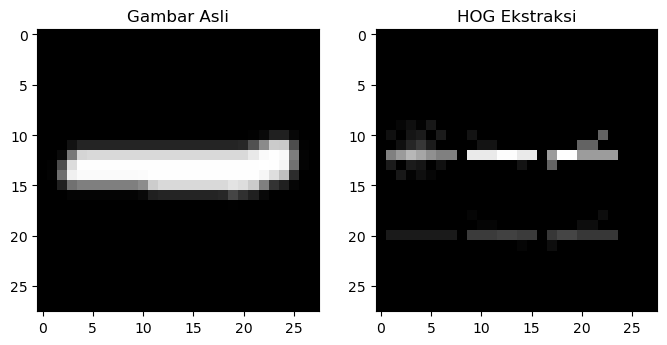

NameError: name 'X_test_hog' is not defined

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Gantilah 'emnist-bymerge-test.csv' dengan nama file CSV Anda
data = pd.read_csv('emnist-bymerge-train.csv')

# Pisahkan fitur (gambar) dan label
X = data.iloc[:, 1:].values  # Asumsikan kolom pertama adalah label
y = data.iloc[:, 0].values   # Asumsikan kolom pertama adalah label

# Bagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from skimage import exposure

def extract_hog_features(images, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    hog_features = []
    hog_images = []
    for image in images:
        # Reshape image to 28x28 (atau ukuran gambar asli)
        image = image.reshape((28, 28))
        
        # Ekstraksi fitur HOG dengan visualisasi
        feature, hog_image = hog(
            image, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, 
            visualize=True, block_norm='L2-Hys'
        )
        
        hog_features.append(feature)
        hog_images.append(hog_image)
        
    return np.array(hog_features), hog_images

# Ekstraksi fitur HOG dan simpan visualisasi untuk sampel pertama
X_train_hog, hog_images = extract_hog_features(X_train[:1])

# Tampilkan gambar asli dan HOG-nya
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title("Gambar Asli")

plt.subplot(1, 2, 2)
plt.imshow(hog_images[0], cmap='gray')
plt.title("HOG Ekstraksi")
plt.show()

# Membuat pipeline dengan HOG extraction, normalisasi, dan SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling untuk mengoptimalkan SVM
    ('svm', SVC())
])

# Definisikan parameter grid untuk tuning
param_grid = {
    'svm__C': [0.1, 1, 10],            # Parameter regulasi untuk SVM
}

# Mencari parameter terbaik dengan GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2)
grid.fit(X_test_hog, y_test)

# Hasil grid search
print("Best parameters:", grid.best_params_)

# Evaluasi model dengan data uji
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
